In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Function to read multiple csv files
def readCSV(filenames):
    df = {filename: pd.read_csv(f"data/{filename}.csv") for filename in filenames}
    return df

# List of csv files
filenames = [
    "201904 sales reciepts",
    "pastry inventory",
    "sales targets",
    "customer",
    "product",
    "sales_outlet"
]

# Read all csv files
df = readCSV(filenames)
sales_df = df['201904 sales reciepts']    

# Data Exploration

In [28]:
sales_df.head(5)

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


In [7]:
sales_df.tail()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
49889,753,2019-04-29,16:51:58,8,42,0,N,1,1,30,1,3.0,3.0,N
49890,756,2019-04-29,16:51:14,8,42,8412,Y,1,1,25,2,4.4,2.2,N
49891,759,2019-04-29,11:17:36,8,15,0,Y,1,1,31,1,2.2,2.2,N
49892,763,2019-04-29,15:45:52,8,45,8030,N,1,1,44,2,5.0,2.5,N
49893,763,2019-04-29,15:45:52,8,45,8030,N,1,5,75,1,3.5,3.5,N


In [8]:
sales_df.shape

(49894, 14)

In [9]:
sales_df.size

698516

In [29]:
sales_df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'sales_outlet_id', 'staff_id', 'customer_id', 'instore_yn', 'order',
       'line_item_id', 'product_id', 'quantity', 'line_item_amount',
       'unit_price', 'promo_item_yn'],
      dtype='object')

In [11]:
sales_df.dtypes      

transaction_id        int64
transaction_date     object
transaction_time     object
sales_outlet_id       int64
staff_id              int64
customer_id           int64
instore_yn           object
order                 int64
line_item_id          int64
product_id            int64
quantity              int64
line_item_amount    float64
unit_price          float64
promo_item_yn        object
dtype: object

In [64]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46488 entries, 0 to 46487
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    46488 non-null  int64  
 1   transaction_date  46488 non-null  object 
 2   transaction_time  46488 non-null  object 
 3   sales_outlet_id   46488 non-null  int64  
 4   staff_id          46488 non-null  int64  
 5   customer_id       46488 non-null  int64  
 6   instore_yn        46488 non-null  bool   
 7   order             46488 non-null  int64  
 8   line_item_id      46488 non-null  int64  
 9   product_id        46488 non-null  int64  
 10  quantity          46488 non-null  int64  
 11  line_item_amount  46488 non-null  float64
 12  unit_price        46488 non-null  float64
 13  promo_item_yn     46488 non-null  bool   
 14  Guest             46488 non-null  bool   
dtypes: bool(3), float64(2), int64(8), object(2)
memory usage: 4.4+ MB


In [58]:
sales_df.describe(include='all')

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,Guest
count,49600.000000,49600,49600,49600.000000,49600.000000,49600.000000,49600,49600.000000,49600.000000,49600.000000,49600.000000,49600.000000,49600.000000,49600,49600
unique,NaN,NaN,25943,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,1900-01-01 07:11:25,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,False,False
freq,NaN,NaN,11,NaN,NaN,NaN,24992,NaN,NaN,NaN,NaN,NaN,NaN,49110,24818
mean,871.856734,2019-04-15 02:25:20.129032192,NaN,5.336149,25.313770,2288.686310,NaN,1.174254,1.632601,47.886028,1.438125,4.684756,3.386885,NaN,NaN
min,1.000000,2019-04-01 00:00:00,NaN,3.000000,6.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.800000,NaN,NaN
25%,222.000000,2019-04-08 00:00:00,NaN,3.000000,15.000000,0.000000,NaN,1.000000,1.000000,33.000000,1.000000,3.000000,2.500000,NaN,NaN
50%,486.000000,2019-04-15 00:00:00,NaN,5.000000,26.000000,2.000000,NaN,1.000000,1.000000,47.000000,1.000000,3.750000,3.000000,NaN,NaN
75%,1408.000000,2019-04-22 00:00:00,NaN,8.000000,41.000000,5415.250000,NaN,1.000000,1.000000,60.000000,2.000000,6.000000,3.750000,NaN,NaN
max,4203.000000,2019-04-29 00:00:00,NaN,8.000000,45.000000,8501.000000,NaN,9.000000,12.000000,87.000000,8.000000,360.000000,45.000000,NaN,NaN


In [14]:
sales_df.nunique()

transaction_id       4203
transaction_date       29
transaction_time    26074
sales_outlet_id         3
staff_id               25
customer_id          2248
instore_yn              3
order                   9
line_item_id           11
product_id             80
quantity                6
line_item_amount       77
unit_price             41
promo_item_yn           2
dtype: int64

# Data Preperation(Data Cleaning)

In [15]:
sales_df.isnull()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49890,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49891,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49892,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
missing_vales = sales_df.isnull().sum()
missing_vales

transaction_id      0
transaction_date    0
transaction_time    0
sales_outlet_id     0
staff_id            0
customer_id         0
instore_yn          0
order               0
line_item_id        0
product_id          0
quantity            0
line_item_amount    0
unit_price          0
promo_item_yn       0
dtype: int64

In [19]:
sales_df.duplicated().sum()

0

In [20]:
sales_df.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
sales_outlet_id       int64
staff_id              int64
customer_id           int64
instore_yn           object
order                 int64
line_item_id          int64
product_id            int64
quantity              int64
line_item_amount    float64
unit_price          float64
promo_item_yn        object
dtype: object

In [21]:
sales_df['line_item_id'].unique()

array([ 1,  5,  2,  3,  9,  4,  6, 12, 10,  7,  8], dtype=int64)

In [22]:
sales_df['instore_yn'].unique()

array(['N', 'Y', ' '], dtype=object)

In [23]:
sales_df['instore_yn'].value_counts()

instore_yn
Y    24992
N    24608
       294
Name: count, dtype: int64

In [70]:
# Remove rows where the value in the 'instore_yn' column is a single space (' ')
sales_df = sales_df[sales_df['instore_yn'] != ' ']

In [6]:
# See what the unique values in 'instore_yn'
sales_df['instore_yn'].unique()

array(['N', 'Y'], dtype=object)

In [31]:
sales_df.head(5)

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


In [29]:
# Print unique values of 'sales_outlet_id', 'promo_item_yn', 'transaction_date', and 'staff_id' columns, 
# as well as the count of unique customer IDs sorted in descending orderprint
(sales_df['sales_outlet_id'].unique())
print(sales_df['promo_item_yn'].unique())
print(sales_df['transaction_date'].unique())
print(sales_df['staff_id'].unique())
print(sales_df['customer_id'].value_counts())


['N' 'Y']
['2019-04-01' '2019-04-02' '2019-04-03' '2019-04-04' '2019-04-05'
 '2019-04-06' '2019-04-07' '2019-04-08' '2019-04-09' '2019-04-10'
 '2019-04-11' '2019-04-12' '2019-04-13' '2019-04-14' '2019-04-15'
 '2019-04-16' '2019-04-17' '2019-04-18' '2019-04-19' '2019-04-20'
 '2019-04-21' '2019-04-22' '2019-04-23' '2019-04-24' '2019-04-25'
 '2019-04-26' '2019-04-27' '2019-04-28' '2019-04-29']
[12 17 30 26 42 45 15 20 16 14 29 27 44  6  7  9 10  8 28 25 41 43 18 19]
customer_id
0       24782
3          31
8285       31
548        31
8341       29
        ...  
359         1
5589        1
5784        1
427         1
5668        1
Name: count, Length: 2248, dtype: int64


**Dealing with the large number of zero customer identifiers in the dataset**

In [71]:
print('The number of guest customers:', (sales_df['customer_id'] == 0).sum())
sales_df['Guest'] = sales_df['customer_id'] == 0 

The number of guest customers: 24782


C:\Users\farha\AppData\Local\Temp\ipykernel_13660\1551004120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['Guest'] = sales_df['customer_id'] == 0


In [33]:
print(sales_df['Guest'].value_counts())

Guest
False    24818
True     24782
Name: count, dtype: int64


In [32]:
sales_df.head(5)

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,Guest
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N,False
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N,False
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N,False
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N,False
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N,False


In [72]:
# Convert 'transaction_date' & 'transaction_time' columns to datetime format
sales_df['transaction_date'] = pd.to_datetime(sales_df['transaction_date'])
sales_df['transaction_time'] = pd.to_datetime(sales_df['transaction_time'], format='%H:%M:%S')

# Replace 'N' with 0 and 'Y' with 1 in the 'promo_item_yn' column
sales_df['promo_item_yn'] = sales_df['promo_item_yn'].replace({'N': 0, 'Y': 1})
sales_df['promo_item_yn'] = sales_df['promo_item_yn'].astype('boolean')

sales_df['instore_yn'] = sales_df['instore_yn'].replace({'N': 0, 'Y': 1})
sales_df['instore_yn'] = sales_df['instore_yn'].astype('boolean')

C:\Users\farha\AppData\Local\Temp\ipykernel_13660\632243561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['transaction_date'] = pd.to_datetime(sales_df['transaction_date'])
C:\Users\farha\AppData\Local\Temp\ipykernel_13660\632243561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['transaction_time'] = pd.to_datetime(sales_df['transaction_time'], format='%H:%M:%S')
C:\Users\farha\AppData\Local\Temp\ipykernel_13660\632243561.py:6: FutureWarning: Downcasting behavior in `replace` is

In [35]:
sales_df.head(10)

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,Guest
0,7,2019-04-01,1900-01-01 12:04:43,3,12,558,False,1,1,52,1,2.50,2.50,False,False
1,11,2019-04-01,1900-01-01 15:54:39,3,17,781,False,1,1,27,2,7.00,3.50,False,False
2,19,2019-04-01,1900-01-01 14:34:59,3,17,788,True,1,1,46,2,5.00,2.50,False,False
3,32,2019-04-01,1900-01-01 16:06:04,3,12,683,False,1,1,23,2,5.00,2.50,False,False
4,33,2019-04-01,1900-01-01 19:18:37,3,17,99,True,1,1,34,1,2.45,2.45,False,False
5,39,2019-04-01,1900-01-01 18:54:46,3,17,664,True,1,1,32,1,3.00,3.00,False,False
6,50,2019-04-01,1900-01-01 13:03:49,3,12,316,False,1,1,49,2,6.00,3.00,False,False
7,53,2019-04-01,1900-01-01 11:21:14,3,12,38,False,1,1,60,1,3.75,3.75,False,False
8,59,2019-04-01,1900-01-01 19:30:55,3,12,370,True,1,1,51,2,6.00,3.00,False,False
9,62,2019-04-01,1900-01-01 12:01:00,3,12,180,True,1,1,49,2,6.00,3.00,False,False


In [73]:
data = sales_df.copy()
data.to_csv('data/201904 sales reciepts.csv', index=False)

In [41]:
customer_df = df['customer']    
generations_df = df['generations']   
merged_data = pd.merge(customer_df, generations_df, on='birth_year')

merged_data = merged_data[['customer_id', 'home_store', 'customer_first-name', 'customer_email', 
                           'customer_since', 'loyalty_card_number', 'birthdate', 'gender', 
                           'birth_year', 'generation']]

merged_data.to_csv('data/customer.csv', index=False)

In [54]:
product_df = df['product']    

product_df['promo_yn'] = product_df['promo_yn'].replace({'N': 0, 'Y': 1})
product_df['tax_exempt_yn'] = product_df['tax_exempt_yn'].replace({'N': 0, 'Y': 1})

product_df['unit'] = product_df['unit_of_measure'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else '')
product_df['measure'] = product_df['unit_of_measure'].apply(lambda x: x.split()[0] if len(x.split()) > 0 else '')

product_df['current_retail_price'] = product_df['current_retail_price'].replace('[\$,]', '', regex=True).astype('double')
product_df['promo_yn'] = product_df['promo_yn'].astype('boolean')
product_df['tax_exempt_yn'] = product_df['tax_exempt_yn'].astype('boolean')

product_df.drop(columns=['unit_of_measure'], inplace=True)

<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
C:\Users\farha\AppData\Local\Temp\ipykernel_13660\2634575347.py:9: SyntaxWarning: invalid escape sequence '\$'
  product_df['current_retail_price'] = product_df['current_retail_price'].replace('[\$,]', '', regex=True).astype('double')
C:\Users\farha\AppData\Local\Temp\ipykernel_13660\2634575347.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  product_df['promo_yn'] = product_df['promo_yn'].replace({'N': 0, 'Y': 1})
C:\Users\farha\AppData\Local\Temp\ipykernel_13660\2634575347.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fals

In [55]:
product_df.to_csv('data/product.csv', index=False)
product_df

,product_id,product_group,product_category,product_type,product,product_description,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,unit,measure
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,14.40,18.00,True,False,N,oz,12
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,14.40,18.00,True,False,N,oz,12
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,11.80,14.75,True,False,N,lb,1
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,16.36,20.45,True,False,N,lb,1
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,12.00,15.00,True,False,N,lb,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,Add-ons,Flavours,Regular syrup,Chocolate syrup,Bursting with chocolate flavour,0.04,0.80,True,False,N,,pump
84,85,Beverages,Coffee,Specialty coffee,Rio Nights,2 shots of Ouro Brasilerio and pure cane sugar...,1.20,6.00,True,False,Y,oz,6
85,87,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,From Rio,0.60,3.00,True,False,N,oz,1.5
86,88,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot promo,Ouro promo,0.42,2.10,True,True,N,oz,16


## EDA Questions 
#### Get sales (Transactions)for each store on monthly and daily basis

**What are the total sales for each store on a daily basis?**

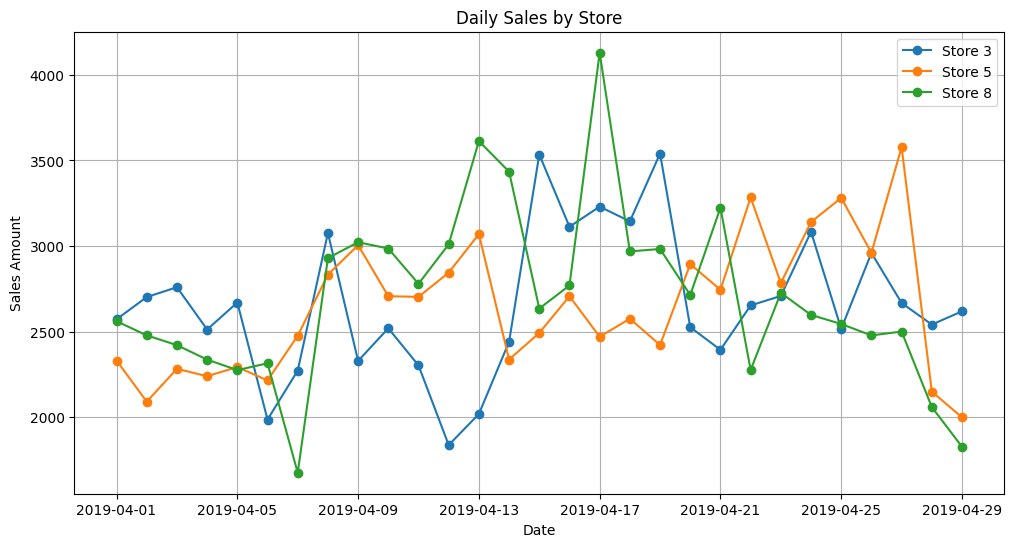

In [11]:
def calculate_line_item_amount(df, column_name):
    daily_sales = df.groupby([column_name, 'sales_outlet_id']).agg({'line_item_amount': 'sum'}).reset_index()
    return daily_sales

def plot_daily_sales_by_store(df):
    column_name = 'transaction_date'
    daily_sales = calculate_line_item_amount(df, column_name)
    daily_sales.columns = [column_name, 'sales_outlet_id', 'daily_sales']
    plt.figure(figsize=(12, 6))
    for outlet_id in daily_sales['sales_outlet_id'].unique():
        outlet_data = daily_sales[daily_sales['sales_outlet_id'] == outlet_id]
        plt.plot(outlet_data[column_name], outlet_data['daily_sales'], marker='o', label=f'Store {outlet_id}')
    plt.title('Daily Sales by Store')
    plt.xlabel('Date')
    plt.ylabel('Sales Amount')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_daily_sales_by_store(sales_df)

**What are the total sales for each store on a weekly basis?**

C:\Users\farha\AppData\Local\Temp\ipykernel_13660\529596404.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'] = df['transaction_date'].dt.to_period('W').astype(str)


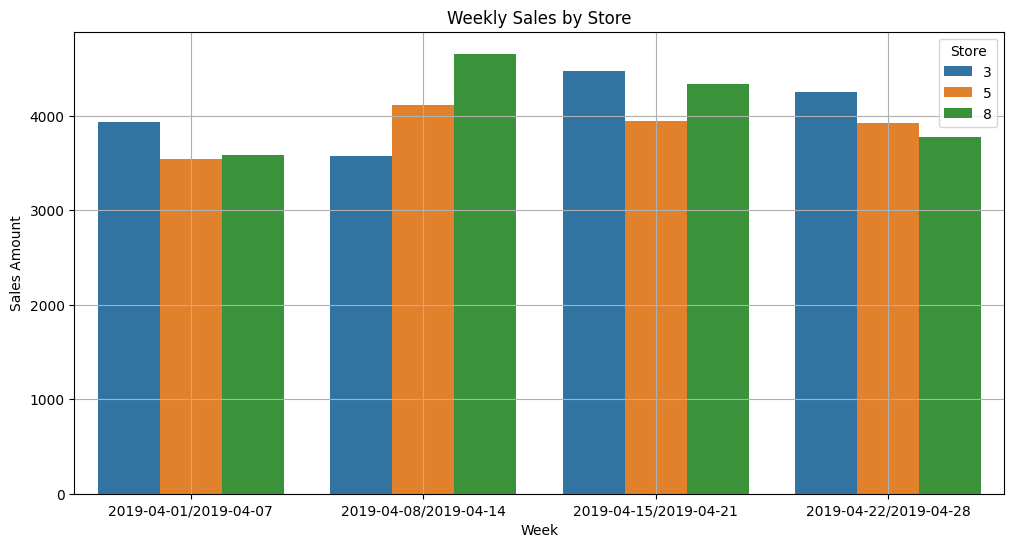

In [19]:
def plot_weekly_sales_by_store(df):   
    # Ensure only complete weeks are included by filtering out data after the last complete week
    last_complete_week = df['transaction_date'].max() - pd.offsets.Week(weekday=6)
    df = df[df['transaction_date'] <= last_complete_week]
    
    # Extract week from transaction date
    df['week'] = df['transaction_date'].dt.to_period('W').astype(str)
    
    # Calculate weekly sales
    weekly_sales = df.groupby(['week', 'sales_outlet_id']).size().reset_index(name='weekly_sales')
    weekly_sales['sales_outlet_id'] = weekly_sales['sales_outlet_id'].astype(str)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='week', y='weekly_sales', hue='sales_outlet_id', data=weekly_sales, dodge=True)
    plt.title('Weekly Sales by Store')
    plt.xlabel('Week')
    plt.ylabel('Sales Amount')
    plt.legend(title='Store')
    plt.grid(True)
    plt.show()

plot_weekly_sales_by_store(sales_df)

**What are the total sales for each store on a monthly basis?**

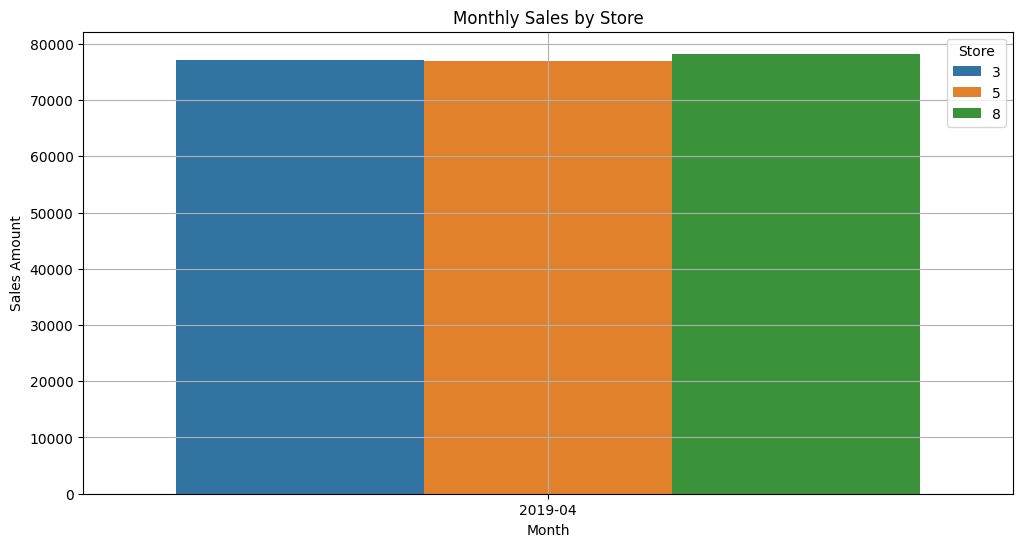

In [37]:
def plot_sales_for_month(df):
    df['month'] = df['transaction_date'].dt.to_period('M').astype(str)
    column_name = 'month'
    monthly_sales = calculate_line_item_amount(df, column_name)
    monthly_sales.columns = [column_name, 'sales_outlet_id', 'monthly_sales']
    monthly_sales['sales_outlet_id'] = monthly_sales['sales_outlet_id'].astype(str)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='month', y='monthly_sales', hue='sales_outlet_id', data=monthly_sales, dodge=True)
    plt.title('Monthly Sales by Store')
    plt.xlabel('Month')
    plt.ylabel('Sales Amount')
    plt.legend(title='Store')
    plt.grid(True)
    plt.show()

plot_sales_for_month(sales_df)

**What are the daily sales per transaction for each day of the month?**

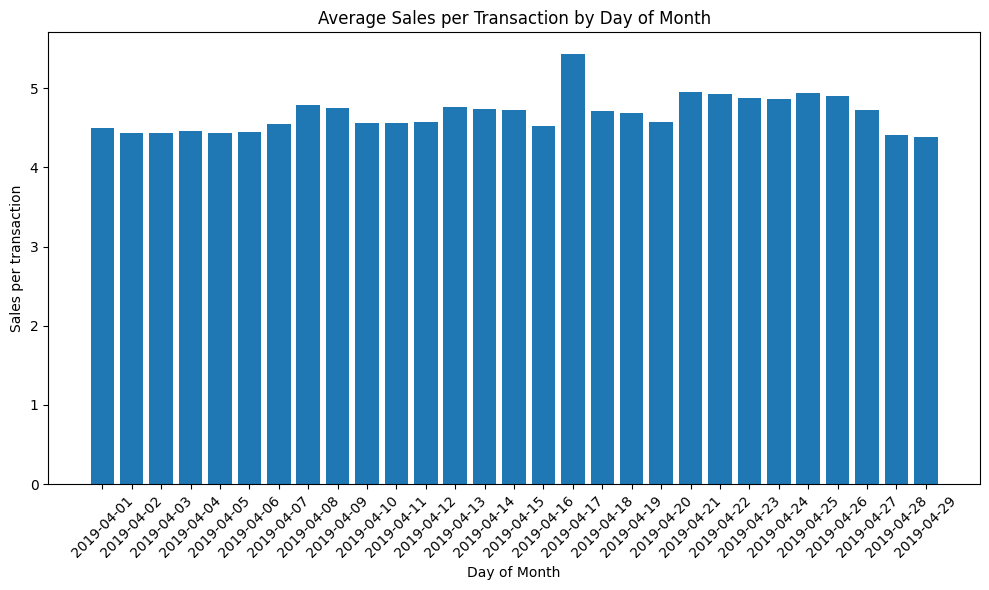

In [11]:
def plot_average_sales_per_transaction_by_day_of_month(df):
    daily_sales_per_transac_by_month = df.groupby('transaction_date')['line_item_amount'].mean()
    plt.figure(figsize=(10, 6))
    plt.bar(daily_sales_per_transac_by_month.index, daily_sales_per_transac_by_month.values)
    plt.tick_params('x', rotation=45)
    plt.xlabel('Day of Month')
    plt.ylabel('Sales per transaction')
    plt.title('Average Sales per Transaction by Day of Month')
    plt.tight_layout()
    plt.show()
plot_average_sales_per_transaction_by_day_of_month(sales_df)

Insight
*   Strong Days: The plot highlights a surge in sales per transaction around the 17th day of the month. This pattern indicates that during these mid-month days, customer spending per transaction is higher.

Usage of Insights:

*   Promotion Timing: Focus promotional efforts around 17th day to capitalize on the existing surge in customer spending.

**What are the peak hours for each store?**

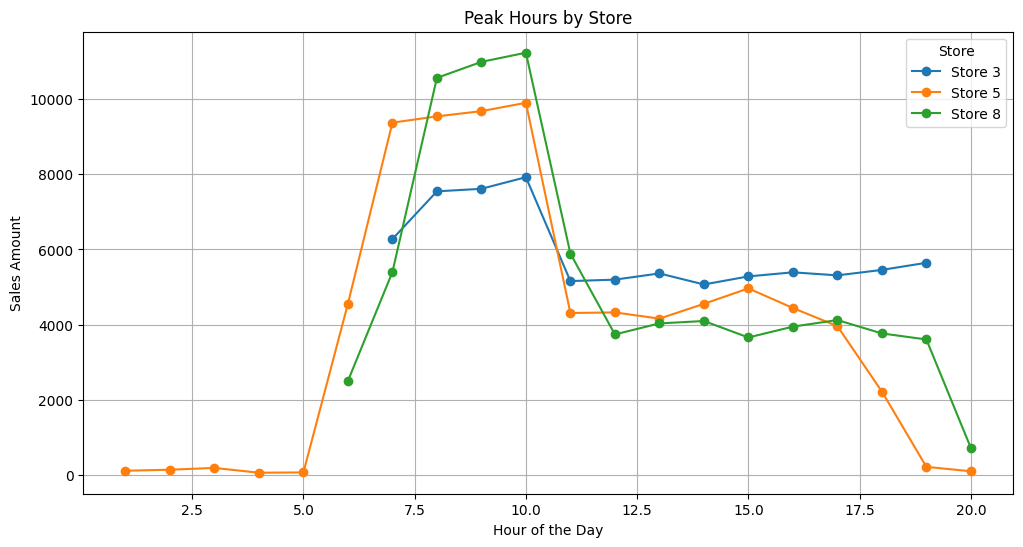

In [40]:
def plot_peak_hours(df):
    df['hour'] = df['transaction_time'].dt.hour
    column_name = 'hour'
    hourly_sales = calculate_line_item_amount(df, column_name)
    hourly_sales.columns = ['hour', 'sales_outlet_id', 'hourly_sales']
    
    plt.figure(figsize=(12, 6))
    for sales_outlet_id, group in hourly_sales.groupby('sales_outlet_id'):
        plt.plot(group['hour'], group['hourly_sales'], marker='o', label=f'Store {sales_outlet_id}')
    plt.title('Peak Hours by Store')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Sales Amount')
    plt.legend(title='Store')
    plt.grid(True)
    plt.show()
plot_peak_hours(sales_df)

- **Morning Peak**: Sales peak between 8 to 10 AM as customers seek stimulating drinks to start their day.
- **Steady Sales**: After 10 AM, sales become more evenly distributed from 11 AM to 7 PM.
- **Sales Disparity**: Sales during peak hours are twice as high as during regular hours. This insight can be used to optimize employee scheduling and task allocation throughout the workday.

**What are the sales for guests and loyal users for each store?**

   Guest  sales_outlet_id  guest_sales
0  False                3     38554.09
3   True                3     38659.14
1  False                5     39953.87
4   True                5     36940.60
2  False                8     35635.77
5   True                8     42620.43


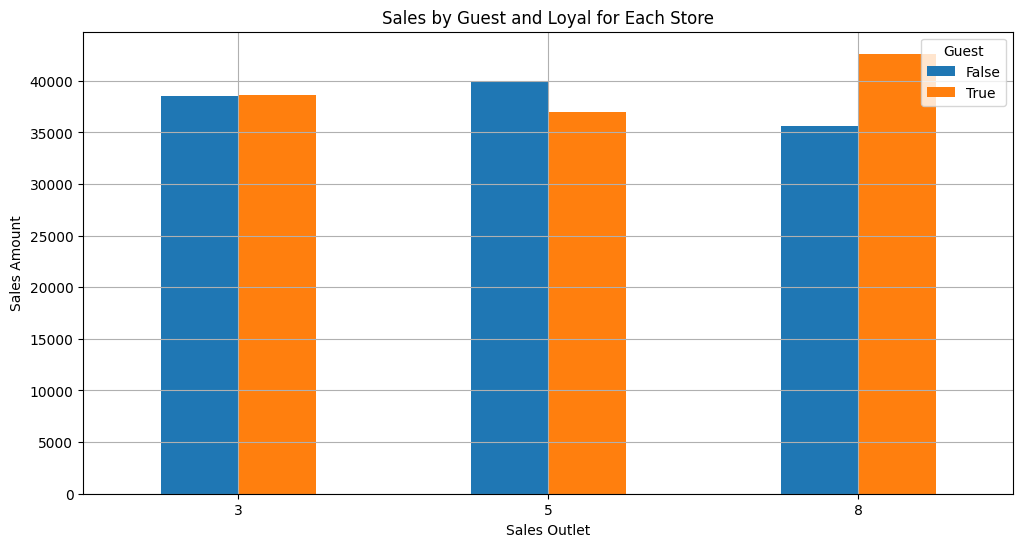

In [39]:
def plot_guest_sales(df):
    column_name = 'Guest'
    guest_sales = calculate_line_item_amount(df, column_name)
    guest_sales.columns = ['Guest', 'sales_outlet_id', 'guest_sales']
    guest_sales['Guest'] = guest_sales['Guest'].astype(str)
    guest_sales_sorted = guest_sales.sort_values(by='sales_outlet_id')
    print(guest_sales_sorted)
    pivot_table_guest = guest_sales_sorted.pivot(index='sales_outlet_id', columns='Guest', values='guest_sales')
    pivot_table_guest.plot(kind='bar', figsize=(12, 6))
    plt.title('Sales by Guest and Loyal for Each Store')
    plt.xlabel('Sales Outlet')
    plt.ylabel('Sales Amount')
    plt.xticks(rotation=0)
    plt.legend(title='Guest')
    plt.grid(True)
    plt.show()

plot_guest_sales(sales_df)


**What is the most Selling Item in each store?**

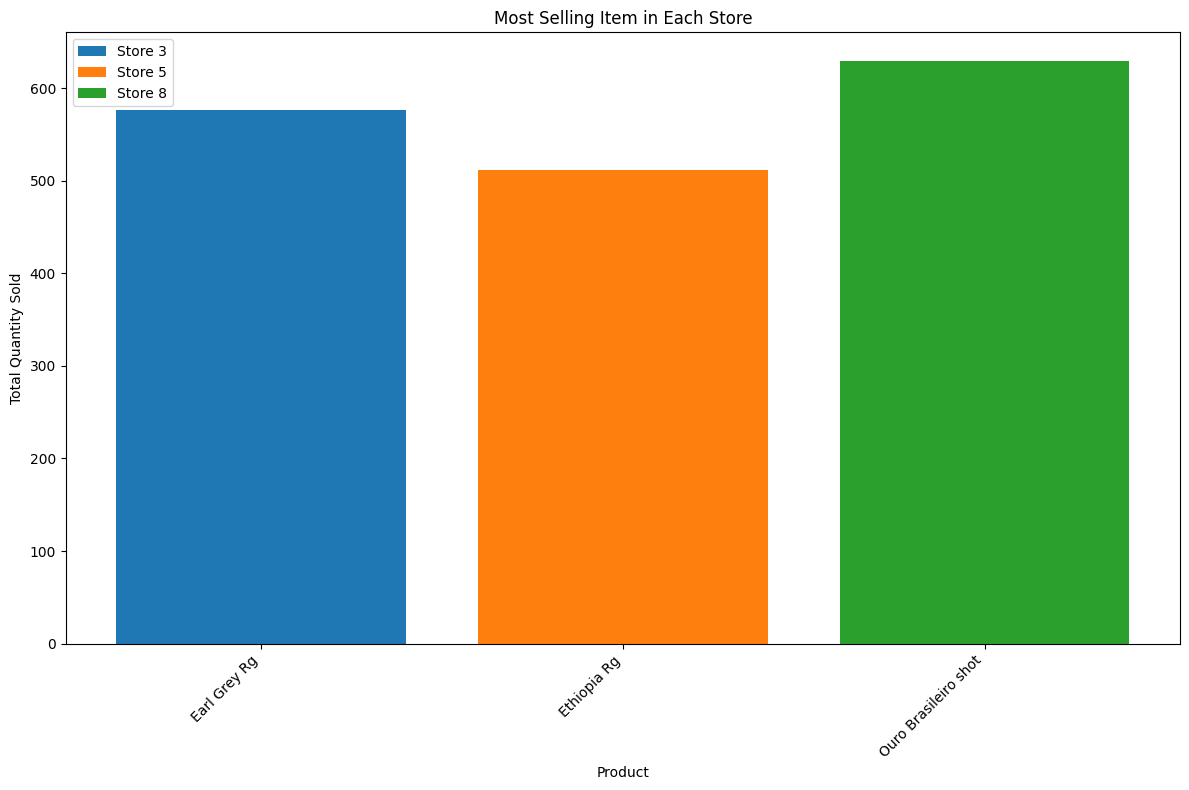

In [43]:
def plot_most_selling_product_per_store(sales_df, product_df):
    merged_df = pd.merge(sales_df, product_df, on='product_id')
    total_sales_per_store = merged_df.groupby(['sales_outlet_id', 'product_id', 'product'])['quantity'].sum().reset_index()
    most_selling_per_store = total_sales_per_store.loc[total_sales_per_store.groupby('sales_outlet_id')['quantity'].idxmax()]
 
    plt.figure(figsize=(12, 8))
    for store_id in most_selling_per_store['sales_outlet_id'].unique():
        store_data = most_selling_per_store[most_selling_per_store['sales_outlet_id'] == store_id]
        plt.bar(store_data['product'], store_data['quantity'], label=f"Store {store_id}")

    plt.xlabel('Product')
    plt.ylabel('Total Quantity Sold')
    plt.title('Most Selling Item in Each Store')
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

product_df = df['product']
plot_most_selling_product_per_store(sales_df, product_df)

**What is the total spending by each gender across different outlets?**


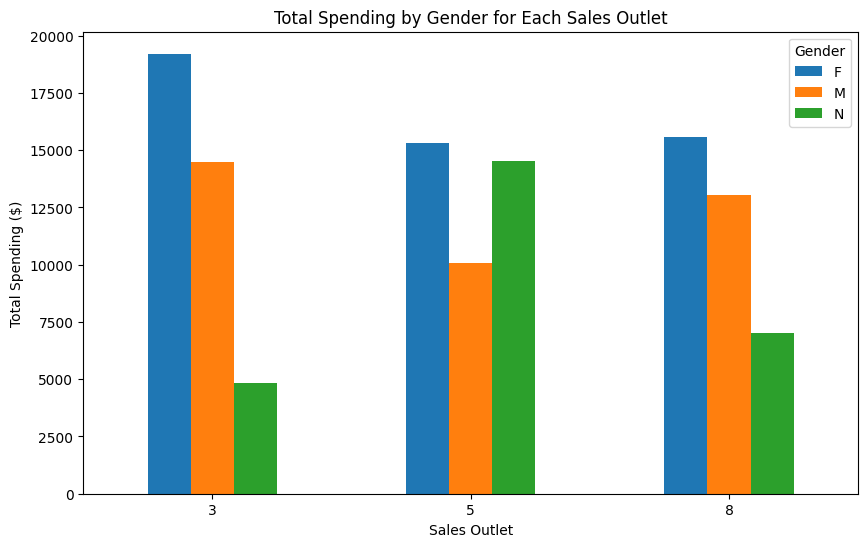

In [45]:
def plot_spending_by_gender_per_outlet(sales_df, customers_df):
    merged_df = pd.merge(sales_df, customers_df, on='customer_id', how='inner')
    column_name = 'gender'
    outlet_gender_sales = calculate_line_item_amount(merged_df, column_name)
    pivot_table_outlet = outlet_gender_sales.pivot(index='sales_outlet_id', columns='gender', values='line_item_amount')
    pivot_table_outlet.plot(kind='bar', figsize=(10, 6))
    plt.title('Total Spending by Gender for Each Sales Outlet')
    plt.xlabel('Sales Outlet')
    plt.ylabel('Total Spending ($)')
    plt.xticks(rotation=0)
    plt.legend(title='Gender')
    plt.show()

customers_df = df['customer']
plot_spending_by_gender_per_outlet(sales_df, customers_df)

**What is the comparison between actual sales and target sales for each sales outlet?**

Total Sales by Outlet:
   sales_outlet_id  line_item_amount  total_goal
0                3          77213.23       18000
1                5          76894.47       25000
2                8          78256.20       22500


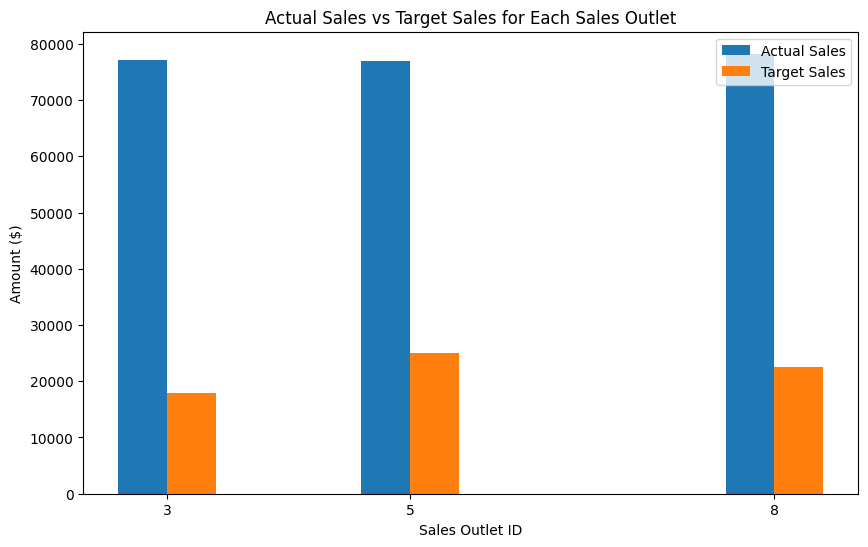

In [60]:
def plot_actual_vs_target_sales(df, target_df):
    total_sales_by_outlet = df.groupby('sales_outlet_id')['line_item_amount'].sum().reset_index()
    total_sales_by_outlet = total_sales_by_outlet.merge(target_df[['sales_outlet_id', 'total_goal']], on='sales_outlet_id', how='left')
    print("Total Sales by Outlet:")
    print(total_sales_by_outlet)
    plt.figure(figsize=(10, 6))
    plt.bar(total_sales_by_outlet['sales_outlet_id'] - 0.2, total_sales_by_outlet['line_item_amount'], width=0.4, label='Actual Sales')
    plt.bar(total_sales_by_outlet['sales_outlet_id'] + 0.2, total_sales_by_outlet['total_goal'], width=0.4, label='Target Sales')
    plt.xlabel('Sales Outlet ID')
    plt.ylabel('Amount ($)')
    plt.title('Actual Sales vs Target Sales for Each Sales Outlet')
    plt.xticks(total_sales_by_outlet['sales_outlet_id'])
    plt.legend()
    plt.show()
    
target_df = df['sales targets']
plot_actual_vs_target_sales(sales_df, target_df)

In [1101]:
sales_df.head(3)

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,Guest,month,hour
0,7,2019-04-01,1900-01-01 12:04:43,3,12,558,N,1,1,52,1,2.5,2.5,0,False,2019-04,12
1,11,2019-04-01,1900-01-01 15:54:39,3,17,781,N,1,1,27,2,7.0,3.5,0,False,2019-04,15
2,19,2019-04-01,1900-01-01 14:34:59,3,17,788,Y,1,1,46,2,5.0,2.5,0,False,2019-04,14


**How many customers placed more than one order, and how many customers placed only one order?**

In [1124]:
num_customers_more_than_1_order = (data['order'] > 1).sum()
print('The number of customers who took more than 1 order:', num_customers_more_than_1_order)
num_customers_1_order = (data['order'] == 1).sum()
print('The number of customers who took 1 order only:', num_customers_1_order)
total_customers = data.shape[0]
percentage_more_than_1_order = (num_customers_more_than_1_order / total_customers) * 100
print(f'Percentage of customers who took more than one order: {percentage_more_than_1_order:.2f}%')
print('Very low percentage')

The number of customers who took more than 1 order: 1505
The number of customers who took 1 order only: 48095
Percentage of customers who took more than one order: 3.03%
Very low percentage


**Which line item had the highest number of customer purchases?**

In [1130]:
num_customers_line_item_id = []
for i in range(1, 9):
    num_customers_line_item_id.append((data['line_item_id'] == i).sum())
for i, count in enumerate(num_customers_line_item_id, start=1):
    print(f'The number of customers with line_item_id {i}:', count)
num_customers_1_line_item_id = (data['line_item_id'] == 1).sum()
num_customers_more_line_item_id = (data['line_item_id'] > 1).sum()
total_customers = data.shape[0]
percentage_1_line_item_id = (num_customers_1_line_item_id / total_customers) * 100
print(f'Percentage of customers who took one line_item_id: {percentage_1_line_item_id:.2f}%')
percentage_more_than_1_line_item_id = (num_customers_more_line_item_id / total_customers) * 100
print(f'Percentage of customers who took more than one line_item_id: {percentage_more_than_1_line_item_id:.2f}%')

The number of customers with line_item_id 1: 39716
The number of customers with line_item_id 2: 2530
The number of customers with line_item_id 3: 503
The number of customers with line_item_id 4: 133
The number of customers with line_item_id 5: 6332
The number of customers with line_item_id 6: 324
The number of customers with line_item_id 7: 1
The number of customers with line_item_id 8: 4
Percentage of customers who took one line_item_id: 80.07%
Percentage of customers who took more than one line_item_id: 19.93%


In [ ]:
num_customers_line_item_id.append((data['line_item_id'] == i).sum())

In [1142]:
df = data[data['promo_item_yn'] == 1]
df2 = data[data['promo_item_yn'] == 0]
data

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,Guest
0,7,2019-04-01,1900-01-01 12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,0,False
1,11,2019-04-01,1900-01-01 15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,0,False
2,19,2019-04-01,1900-01-01 14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,0,False
3,32,2019-04-01,1900-01-01 16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,0,False
4,33,2019-04-01,1900-01-01 19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,1900-01-01 16:51:58,8,42,0,N,1,1,30,1,3.00,3.00,0,True
49890,756,2019-04-29,1900-01-01 16:51:14,8,42,8412,Y,1,1,25,2,4.40,2.20,0,False
49891,759,2019-04-29,1900-01-01 11:17:36,8,15,0,Y,1,1,31,1,2.20,2.20,0,True
49892,763,2019-04-29,1900-01-01 15:45:52,8,45,8030,N,1,1,44,2,5.00,2.50,0,False


In [460]:
customers_df['home_store'].value_counts()

home_store
5    945
3    800
8    501
Name: count, dtype: int64

**What are the daily receipts for each store?**

Daily Receipts:
    sales_outlet_id transaction_date  daily_receipts
0                 3       2019-04-01             584
1                 3       2019-04-02             604
2                 3       2019-04-03             620
3                 3       2019-04-04             571
4                 3       2019-04-05             601
..              ...              ...             ...
82                8       2019-04-25             530
83                8       2019-04-26             536
84                8       2019-04-27             614
85                8       2019-04-28             476
86                8       2019-04-29             418

[87 rows x 3 columns]


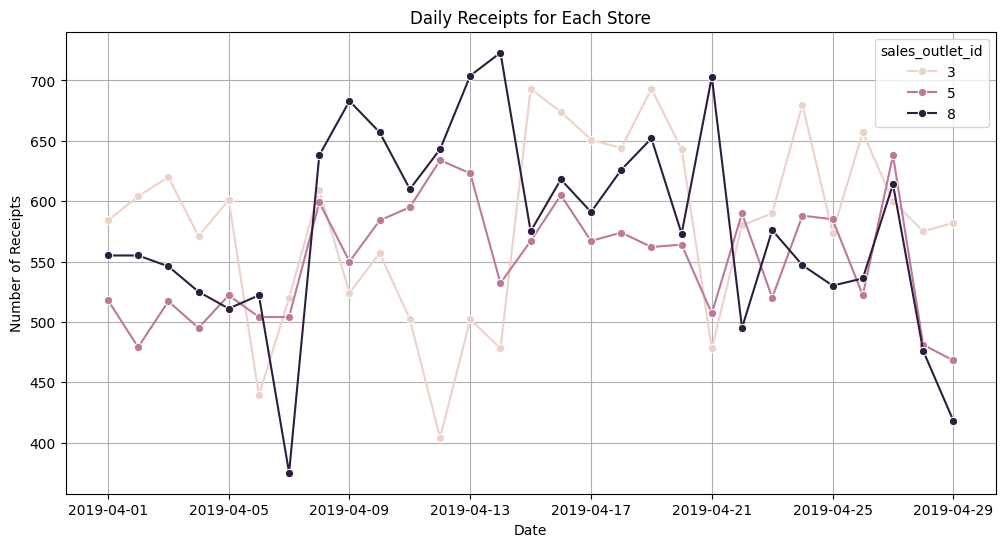

,sales_outlet_id,transaction_date,daily_receipts
0,3,2019-04-01,584
1,3,2019-04-02,604
2,3,2019-04-03,620
3,3,2019-04-04,571
4,3,2019-04-05,601
...,...,...,...
82,8,2019-04-25,530
83,8,2019-04-26,536
84,8,2019-04-27,614
85,8,2019-04-28,476


In [48]:
def get_daily_receipts(sales_df):
    # Aggregate data to get daily receipts for each store
    daily_receipts = sales_df.groupby(['sales_outlet_id', sales_df['transaction_date'].dt.date]).size().reset_index(name='daily_receipts')
    
    print("Daily Receipts:")
    print(daily_receipts)
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=daily_receipts, x='transaction_date', y='daily_receipts', hue='sales_outlet_id', marker='o')
    plt.title('Daily Receipts for Each Store')
    plt.xlabel('Date')
    plt.ylabel('Number of Receipts')
    plt.grid(True)
    plt.show()
    
    return daily_receipts

get_daily_receipts(sales_df)

**What is the best performing store for the month?**

In [49]:
sales_df['transaction_month'] = sales_df['transaction_date'].dt.to_period('M')
monthly_sales_by_store = sales_df.groupby(['sales_outlet_id', 'transaction_month'])['line_item_amount'].sum().reset_index()

# Find the best performing store for each month
best_performing_store_by_month = monthly_sales_by_store.loc[monthly_sales_by_store.groupby('transaction_month')['line_item_amount'].idxmax()]

print("Best Performing Store by Month:")
print(best_performing_store_by_month)

Best Performing Store by Month:
   sales_outlet_id transaction_month  line_item_amount
2                8           2019-04           78256.2


**What are the daily sales for each store throughout the week?**

Daily Sales per Week:
    sales_outlet_id  day_of_week   day_name  daily_sales
0                 3            0     Monday         3048
14                8            0     Monday         2681
7                 5            0     Monday         2742
1                 3            1    Tuesday         2392
15                8            1    Tuesday         2432
8                 5            1    Tuesday         2154
2                 3            2  Wednesday         2508
16                8            2  Wednesday         2341
9                 5            2  Wednesday         2256
17                8            3   Thursday         2291
10                5            3   Thursday         2249
3                 3            3   Thursday         2291
11                5            4     Friday         2240
4                 3            4     Friday         2355
18                8            4     Friday         2342
12                5            5   Saturday         2329
5        

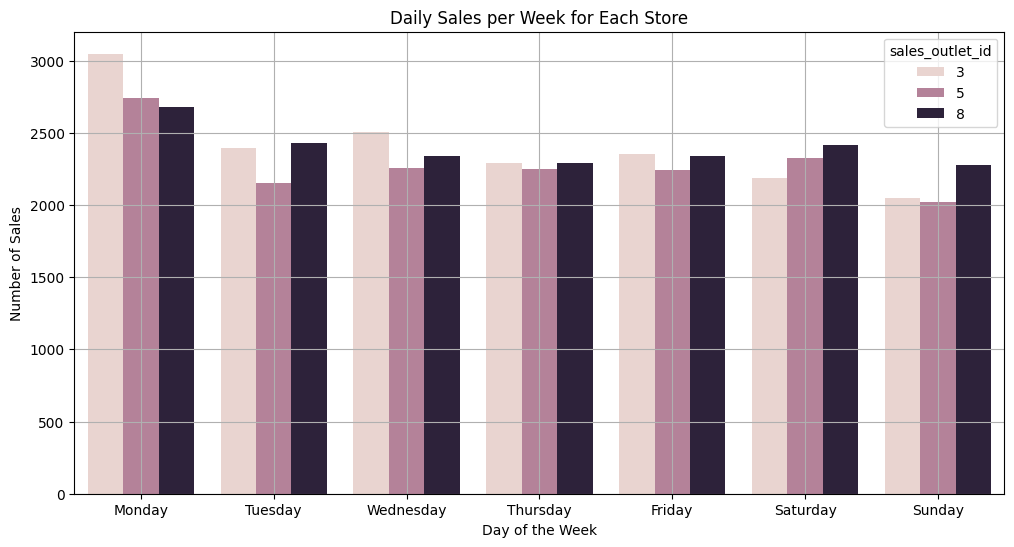

,sales_outlet_id,day_of_week,day_name,daily_sales
0,3,0,Monday,3048
14,8,0,Monday,2681
7,5,0,Monday,2742
1,3,1,Tuesday,2392
15,8,1,Tuesday,2432
8,5,1,Tuesday,2154
2,3,2,Wednesday,2508
16,8,2,Wednesday,2341
9,5,2,Wednesday,2256
17,8,3,Thursday,2291


In [53]:
def get_daily_sales_per_week(sales_df):    
    # Extract the day of the week (Monday=0, Sunday=6)
    sales_df['day_of_week'] = sales_df['transaction_date'].dt.dayofweek
    sales_df['day_name'] = sales_df['transaction_date'].dt.day_name()
    
    # Group by store and day of week to calculate daily sales per week
    daily_sales_per_week = sales_df.groupby(['sales_outlet_id', 'day_of_week', 'day_name']).size().reset_index(name='daily_sales')
    
    # Sort by day_of_week to ensure the days are in order from Monday to Sunday
    daily_sales_per_week = daily_sales_per_week.sort_values(by='day_of_week')
    
    print("Daily Sales per Week:")
    print(daily_sales_per_week)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=daily_sales_per_week, x='day_name', y='daily_sales', hue='sales_outlet_id')
    plt.title('Daily Sales per Week for Each Store')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Sales')
    plt.grid(True)
    plt.show()
    
    return daily_sales_per_week

get_daily_sales_per_week(sales_df)

**What are the most wasted products?**

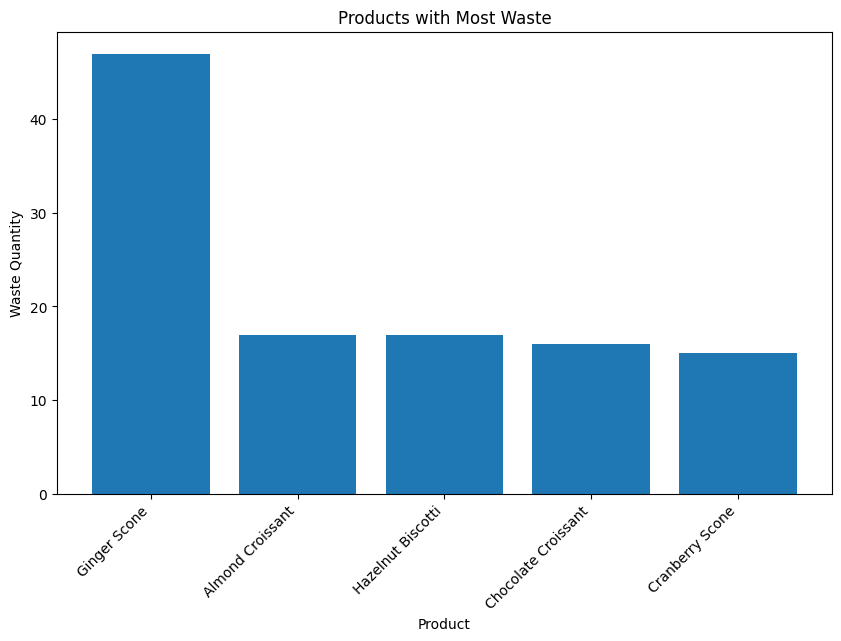

In [76]:
def most_wasted_products(pastry_inventory_df):
    common_product_ids = product_df[product_df['product_id'].isin(sales_df['product_id'])]['product_id']
    filtered_inventory = pastry_inventory_df[pastry_inventory_df['product_id'].isin(common_product_ids)]
    merged_df = filtered_inventory.merge(product_df, how='left', left_on='product_id', right_on='product_id')

    waste_data = merged_df.sort_values(by='waste', ascending=False)
    plt.figure(figsize=(10, 6))
    plt.bar(waste_data['product'], waste_data['waste'])
    plt.xlabel('Product')
    plt.ylabel('Waste Quantity')
    plt.title('Products with Most Waste')
    plt.xticks(rotation=45, ha='right')
    plt.show()

pastry_inventory_df = df['pastry inventory']
most_wasted_products(pastry_inventory_df)

**Which products in the pastry inventory have the highest quantity sold?**

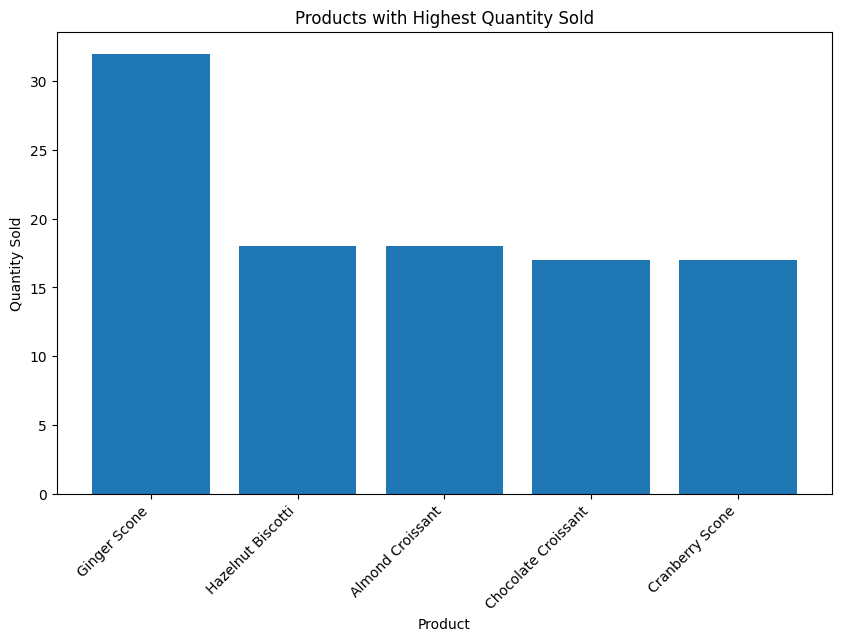

In [83]:
def most_sold_products(pastry_inventory_df):
    common_product_ids = product_df[product_df['product_id'].isin(sales_df['product_id'])]['product_id']
    filtered_inventory = pastry_inventory_df[pastry_inventory_df['product_id'].isin(common_product_ids)]
    merged_df = filtered_inventory.merge(product_df, how='left', left_on='product_id', right_on='product_id')
    sorted_df = merged_df.sort_values(by='quantity_sold', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(sorted_df['product'], sorted_df['quantity_sold'])
    plt.xlabel('Product')
    plt.ylabel('Quantity Sold')
    plt.title('Products with Highest Quantity Sold')
    plt.xticks(rotation=45, ha='right')
    plt.show()

most_sold_products(pastry_inventory_df)

**Which generation buys the most?**

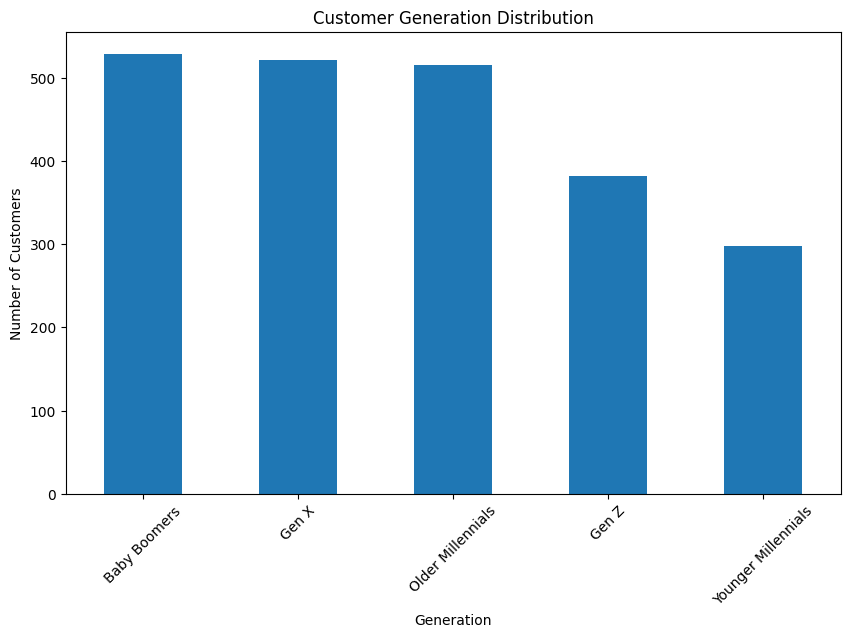

In [63]:
def plot_customer_generation(generation_df, customers_df):
    customers_df['birth_year'] = pd.to_datetime(customers_df['birthdate']).dt.year
    merged_df = pd.merge(customers_df, generation_df, on='birth_year')

    plt.figure(figsize=(10, 6))
    merged_df['generation'].value_counts().plot(kind='bar')
    plt.title('Customer Generation Distribution')
    plt.xlabel('Generation')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    plt.show()

generation_df_copy = df['generations'].copy()
customers_df_copy = customers_df.copy()
plot_customer_generation(generation_df_copy, customers_df_copy)

**Which city has the highest total sales amount?**

City with the most sales:
store_city           New York
line_item_amount    155150.67
Name: 1, dtype: object


C:\Users\farha\AppData\Local\Temp\ipykernel_26028\2624247904.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='store_city', y='line_item_amount', data=city_sales, palette='viridis')


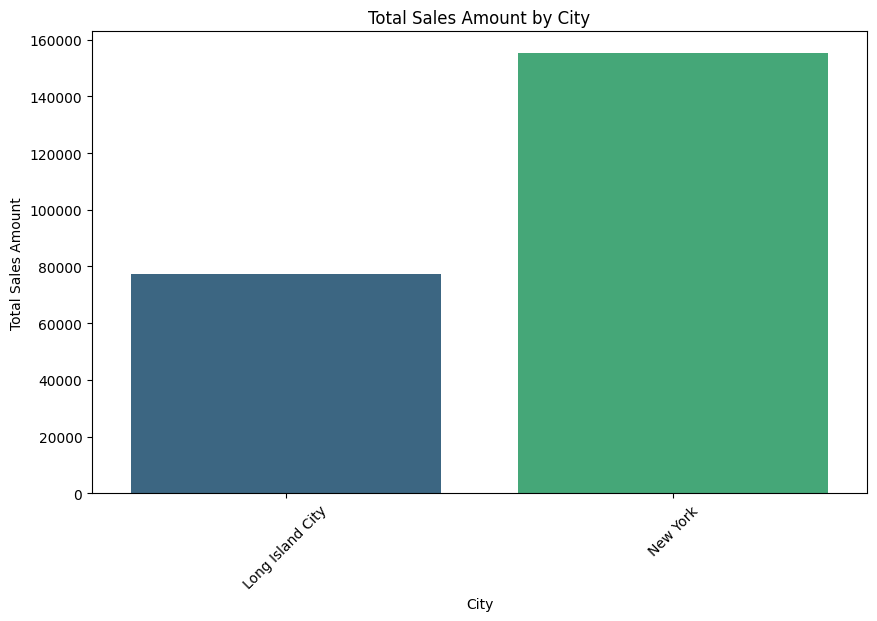

store_city           New York
line_item_amount    155150.67
Name: 1, dtype: object

In [72]:
def analyze_city_sales(df, outlet_city_df):
    # Merge sales data with city information
    merged_df = pd.merge(df, outlet_city_df, on='sales_outlet_id')
    
    # Group by city and calculate total sales amount
    city_sales = merged_df.groupby('store_city')['line_item_amount'].sum().reset_index()

    # Identify the city with the most sales
    most_sales_city = city_sales.loc[city_sales['line_item_amount'].idxmax()]

    print("City with the most sales:")
    print(most_sales_city)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='store_city', y='line_item_amount', data=city_sales, palette='viridis')
    plt.title('Total Sales Amount by City')
    plt.xlabel('City')
    plt.ylabel('Total Sales Amount')
    plt.xticks(rotation=45)
    plt.show()

    return most_sales_city

outlet_city_df = pd.DataFrame(df['sales_outlet'])[['sales_outlet_id', 'store_city']]

most_sales_city = analyze_city_sales(sales_df, outlet_city_df)
most_sales_city

**What is the proportion of tax-exempt versus taxable products?**

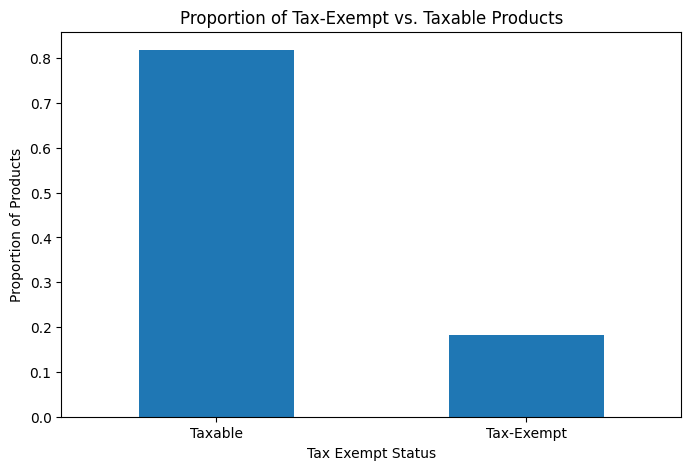

In [85]:
def analyze_tax_status_distribution(product_df):
    # Proportion of tax-exempt and taxable products
    tax_status_counts = product_df['tax_exempt_yn'].value_counts(normalize=True)

    plt.figure(figsize=(8, 5))
    tax_status_counts.plot(kind='bar')
    plt.xlabel('Tax Exempt Status')
    plt.ylabel('Proportion of Products')
    plt.title('Proportion of Tax-Exempt vs. Taxable Products')
    plt.xticks([0, 1], ['Taxable', 'Tax-Exempt'], rotation=0)
    plt.show()

analyze_tax_status_distribution(product_df)

**What is the distribution of in-store versus online transactions?**

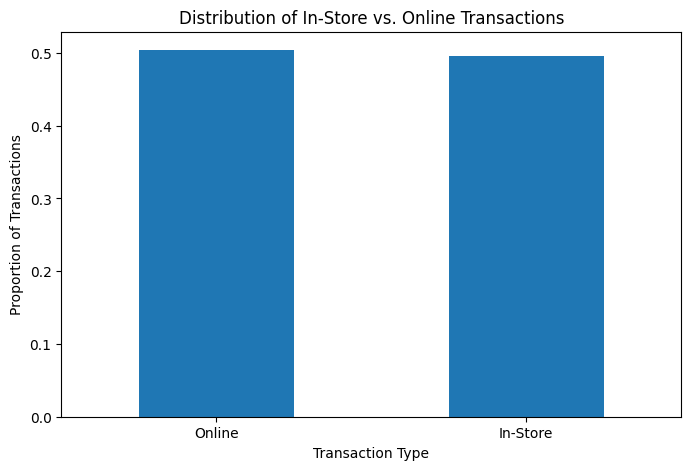

In [87]:
def analyze_instore_online_transactions(sales_df):
    # Calculate the count and proportion of in-store and online transactions
    instore_counts = sales_df['instore_yn'].value_counts(normalize=True)

    plt.figure(figsize=(8, 5))
    instore_counts.plot(kind='bar')
    plt.xlabel('Transaction Type')
    plt.ylabel('Proportion of Transactions')
    plt.title('Distribution of In-Store vs. Online Transactions')
    plt.xticks([0, 1], ['Online', 'In-Store'], rotation=0)
    plt.show()

analyze_instore_online_transactions(sales_df)

**What is the distribution of drink sizes sold?**

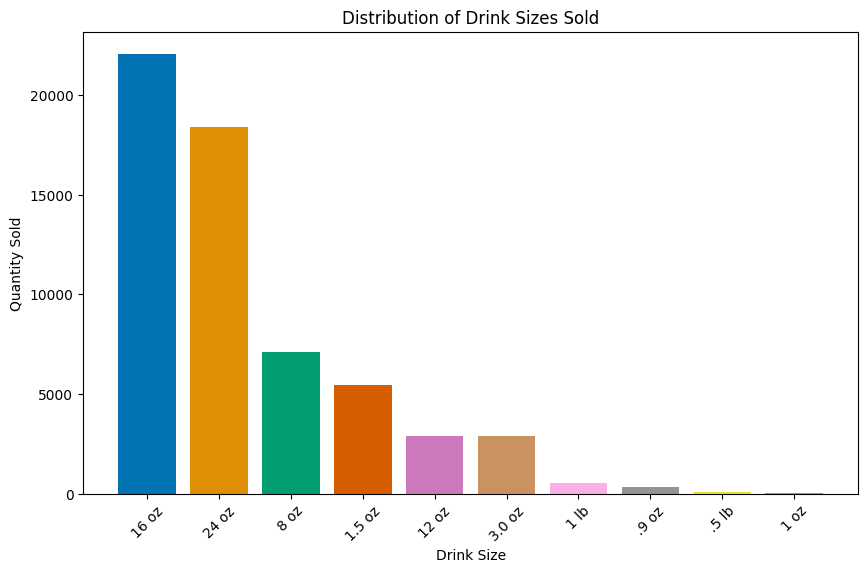

In [91]:
def analyze_drink_size_distribution(product_df, sales_df):
    # Merge the sales and product data on product_id
    merged_df = pd.merge(sales_df, product_df, on='product_id')
    
    # Filter the merged DataFrame to include only drinks
    drinks_df = merged_df[merged_df['product_group'].str.contains('Beverages|Whole Bean/Teas', case=False, na=False)]

    # Group by unit of measure and sum the quantities
    drink_size_distribution = drinks_df.groupby('unit_of_measure')['quantity'].sum().sort_values(ascending=False)

    colorblind_palette = sns.color_palette("colorblind")

    plt.figure(figsize=(10, 6))
    plt.bar(drink_size_distribution.index, drink_size_distribution.values, color=colorblind_palette)
    plt.xlabel('Drink Size')
    plt.ylabel('Quantity Sold')
    plt.title('Distribution of Drink Sizes Sold')
    plt.xticks(rotation=45)
    plt.show()

analyze_drink_size_distribution(product_df, sales_df)